# **Clean and transformation CSV**

We must ensure that the database is created in MySQL before proceeding with the migration.
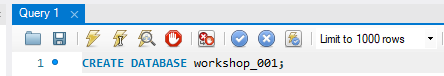

The goal of this notebook is to:  

✔ **Migrate the raw CSV** as a **data table** in **MySQL**, named **`raw_candidates`**.  
✔ Start working with the data **directly from the database**.  
✔ Later, clean the data in a **separate notebook** that we will create. 

In [3]:
import pandas as pd
import sys
sys.path.append("C:/Users/gabri/OneDrive/Documentos/Universidad/ETL/workshop")
from db_folder.db import get_connection
import numpy as np

def create_raw_table():
    conn = get_connection()
    cursor = conn.cursor()
    
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS raw_candidates (
            id INT AUTO_INCREMENT PRIMARY KEY,
            first_name VARCHAR(255),
            last_name VARCHAR(255),
            email VARCHAR(255),
            application_date VARCHAR(50),
            country VARCHAR(255),
            yoe INT,
            seniority VARCHAR(50),
            technology VARCHAR(100),
            code_challenge_score INT(50),
            technical_interview_score INT(50)
        )
    """)
    
    conn.commit()
    cursor.close()
    conn.close()
    print("Table 'raw_candidates' create.")

def insert_raw_data():
    conn = get_connection()
    cursor = conn.cursor()
    
    # Load Original CSV
    file_path = "C:/Users/gabri/OneDrive/Documentos/Universidad/ETL/workshop/csv/candidates.csv"
    df = pd.read_csv(file_path, sep=";")
    # Convert NaN to None for not problems
    df = df.replace({np.nan: None})
    
    insert_query = """
        INSERT INTO raw_candidates (
            first_name, last_name, email, application_date, country, yoe, seniority, 
            technology, code_challenge_score, technical_interview_score
        ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """
    
    data = [
        (
            row["First Name"], row["Last Name"], row["Email"], row["Application Date"],
            row["Country"], row["YOE"], row["Seniority"], row["Technology"],
            row["Code Challenge Score"], row["Technical Interview Score"]
        )
        for _, row in df.iterrows()
    ]
    
    cursor.executemany(insert_query, data)
    conn.commit()
    cursor.close()
    conn.close()
    print("Csv insert into 'workshop_001' database in the table 'raw_candidates'.")
    
create_raw_table()
insert_raw_data()


Table 'raw_candidates' create.
Csv insert into 'workshop_001' database in the table 'raw_candidates'.


## We will continue with the clean and transform in the third notebook:  

**cleanAndTransform-003.ipynb**
